<a href="https://colab.research.google.com/github/Jayasreeyellapu/FMML-Labs2024.ipynb/blob/main/FMML_M4Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad
# Module 4: Perceptron and Gradient Descent
## Lab 3: Gradient Descent

Gradient descent is a very important algorithm to understand, as it underpins many of the more advanced algorithms used in Machine Learning and Deep Learning.

A brief overview of the algorithm is


*   start with a random initialization of the solution.
*   incrementally change the solution by moving in the direction of negative gradient of the objective function.
*   repeat the previous step until some convergence criteria is met.

The key equation for change in weight is:
$$w^{k+1} \leftarrow w^k - \eta \Delta J$$

In this lab, we will discuss stochastic gradient descent, mini-batch gradient descent and batch gradient descent.


In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
np.random.seed(42)

# Creating the Data

Let's generate some data with:
\begin{equation} y_0= 4 \end{equation}
\begin{equation} y_1= 3 \end{equation}

and also add some noise to the data.

In [22]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Let's also plot the data we just created

Text(0, 0.5, 'y')

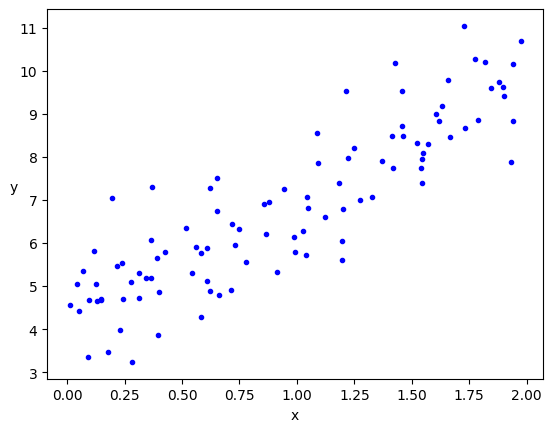

In [23]:
plt.plot(X, y, 'b.')
plt.xlabel('x')
plt.ylabel('y', rotation=0)

## Cost Function

The equation for calculating cost function is as shown below. The cost function is only for linear regression. For other algorithms, the cost function will be different and the gradients would have to be derived from the cost functions

\begin{equation}
J(y_{pred}) = \frac{1}{2} m \sum_{i=1}^{m} (h(y_{pred})^{(i)} - y^{(i)})^2
\end{equation}

In [ ]:
def cal_cost(y_pred, X, y):
    '''
    Calculates the cost for given X and Y.
    y_pred = Vector of y_preds
    X = Row of X's np.zeros((2, j))
    y = Actual y's np.zeros((2, 1))

    where:
        j is the no of features
    '''

    m = len(y)

    predictions = X.dot(y_pred)
    cost = (1 / 2 * m) * np.sum(np.square(predictions - y))

    return cost

## Gradients

\begin{equation}
y_{pred_0}: = y_{pred_0} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
y_{pred_1}: = y_{pred_1} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
.

.

.

.

\begin{equation}
y_{pred_j}: = y_{pred_j} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}

In [ ]:
def gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations, 2))

    for it in range(iterations):
        prediction = np.dot(X, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        y_pred_history[it,:] = y_pred.T
        cost_history[it]  = cal_cost(y_pred, X, y)

    return y_pred, cost_history, y_pred_history

Let's do 1000 iterations with a learning rate of 0.01.
We will start with a random prediction.

In [ ]:
lr = 0.01
n_iter = 1000

y_pred = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history, y_pred_history = gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 3.903
y_pred[1]: 3.046
Final error: 4180.375


Plotting the error vs Number of iterations

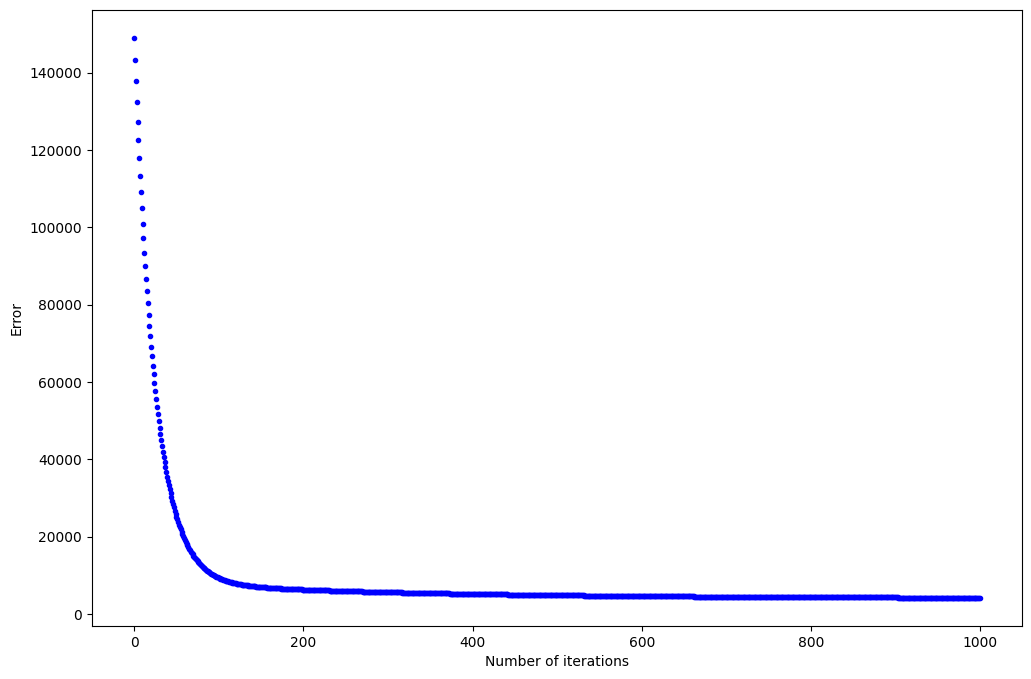

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')

ax.plot(range(n_iter), cost_history, 'b.')

Zooming in...

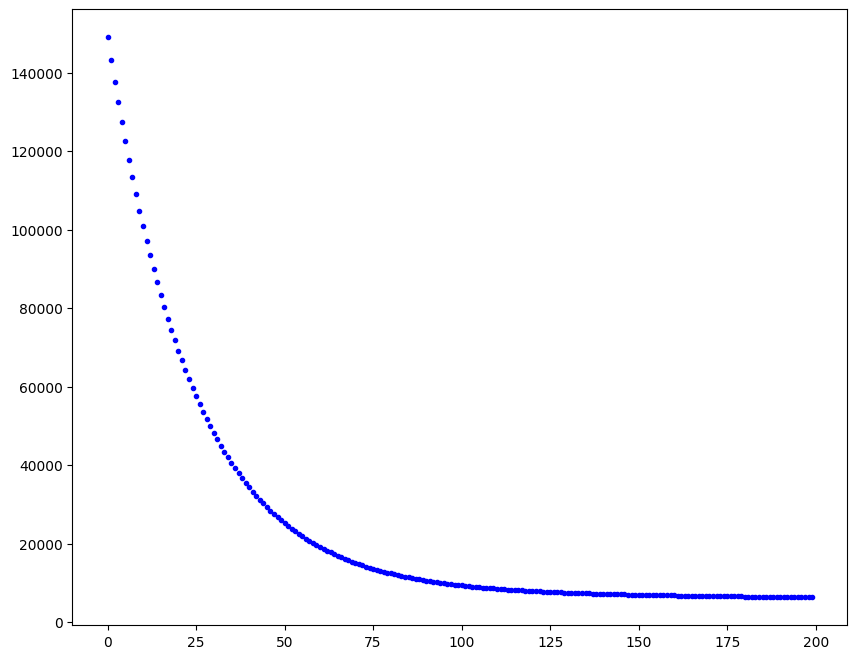

In [ ]:
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(range(200), cost_history[:200], 'b.')

# Stochastic Gradient Descent

In Batch Gradient Descent we were considering all the examples for every step of Gradient Descent. But what if our dataset is very huge. Deep learning models crave for data. The more the data the more chances of a model to be good. Suppose our dataset has 5 million examples, then just to take one step the model will have to calculate the gradients of all the 5 million examples. This does not seem an efficient way. To tackle this problem we have Stochastic Gradient Descent. In Stochastic Gradient Descent (SGD), we consider just one example at a time to take a single step.

In [ ]:
def stocashtic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_pred np.random.randn(j,1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0

        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate *(X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [ ]:
lr = 0.5
n_iter = 50
y_pred = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history = stocashtic_gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.121
y_pred[1]: 2.755
Final error: 41.313


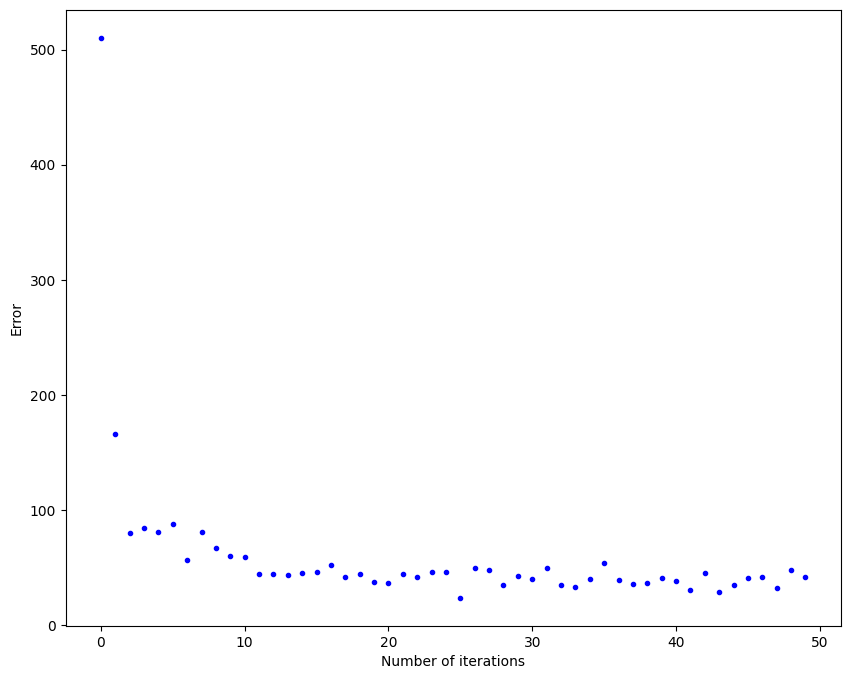

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

# Mini Batch Gradient Descent

We have seen the Batch Gradient Descent. We have also seen the Stochastic Gradient Descent. Batch Gradient Descent can be used for smoother curves. SGD can be used when the dataset is large. Batch Gradient Descent converges directly to minima. SGD converges faster for larger datasets. But, since in SGD we use only one example at a time, we cannot implement the vectorized implementation on it. This can slow down the computations. To tackle this problem, a mixture of Batch Gradient Descent and SGD is used.
Neither we use all the dataset all at once nor we use the single example at a time. We use a batch of a fixed number of training examples which is less than the actual dataset and call it a mini-batch. Doing this helps us achieve the advantages of both the former variants we saw.

In [ ]:
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20):
    '''
    X = Matrix of X without added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [ ]:
lr = 0.1
n_iter = 200
y_pred = np.random.randn(2,1)
y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.148
y_pred[1]: 2.827
Final error: 807.488


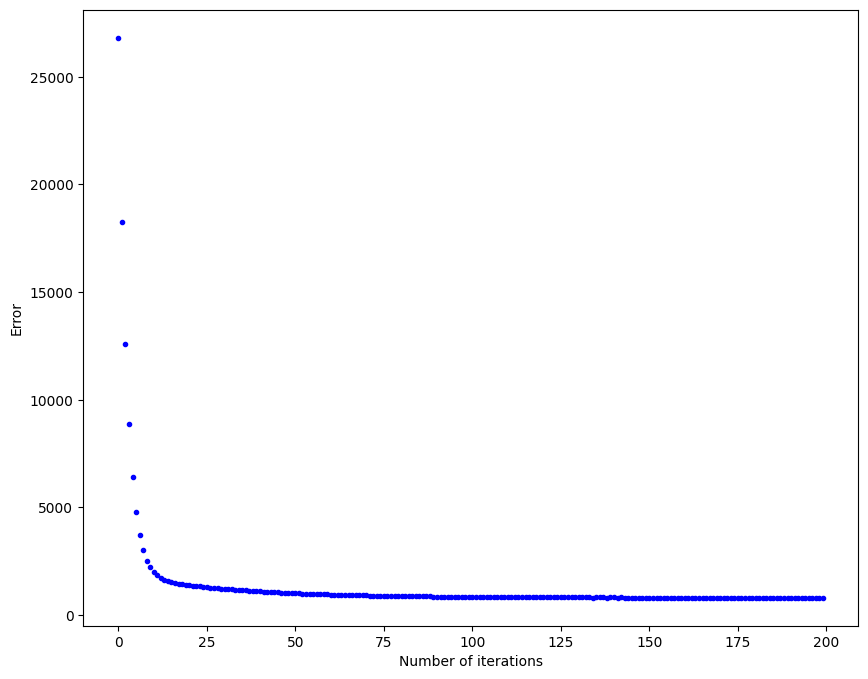

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

Things to try out:

1. Change batch size in mini-batch gradient descent.
2. Test all the three out on real datasets.
3. Compare the effects of changing learning rate by the same amount in Batch GD, SGD and Mini-batch GD.

1. Change batch size in mini-batch gradient descent.

y_pred[0]: 1.979
y_pred[1]: 3.083
Final error: 0.235


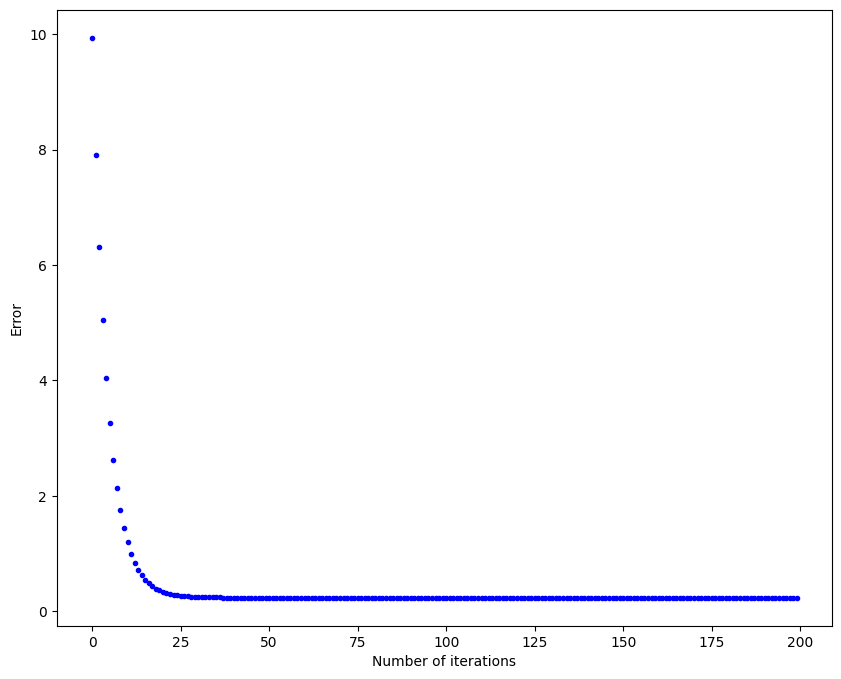

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def cal_cost(y_pred, X, y):
    m = len(y)
    cost = (1 / (2 * m)) * np.sum((np.dot(X, y_pred) - y) ** 2)
    return cost

# Define the minibatch gradient descent function
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20):
    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it] = cost

    return y_pred, cost_history

X = np.random.randn(100, 1)
y = 3 * X.squeeze() + 2 + np.random.randn(100) * 0.5
y = y.reshape(-1, 1)
y_pred = np.random.randn(2, 1)
lr = 0.1
n_iter = 200
batch_size = 50

# Perform minibatch gradient descent
y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter, batch_size)

# Print results
print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

# Plot cost history
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
ax.plot(range(n_iter), cost_history, 'b.')
plt.show()


2. Test all the three out on real datasets.

<ipython-input-17-d288f98406d6>:25: RuntimeWarning: overflow encountered in square
  cost = (1 / (2 * m)) * np.sum((np.dot(X, y_pred) - y) ** 2)
<ipython-input-17-d288f98406d6>:57: RuntimeWarning: invalid value encountered in subtract
  y_pred -= learning_rate * gradients


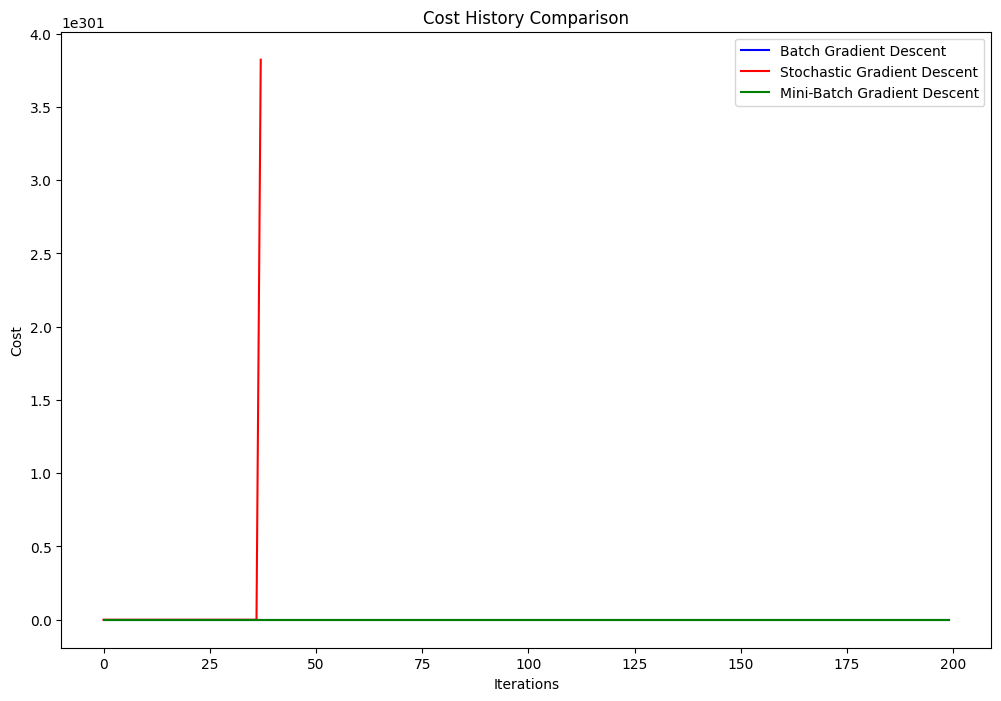

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Standardize the dataset
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = y.reshape(-1, 1)

# Add a column of ones for the bias term
X = np.c_[np.ones(X.shape[0]), X]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the cost function
def cal_cost(y_pred, X, y):
    m = len(y)
    cost = (1 / (2 * m)) * np.sum((np.dot(X, y_pred) - y) ** 2)
    return cost

# Batch Gradient Descent
def batch_gradient_descent(X, y, learning_rate=0.01, iterations=100):
    m, n = X.shape
    y_pred = np.random.randn(n, 1)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        prediction = np.dot(X, y_pred)
        gradients = (1 / m) * X.T.dot(prediction - y)
        y_pred -= learning_rate * gradients
        cost_history[it] = cal_cost(y_pred, X, y)

    return y_pred, cost_history

# Stochastic Gradient Descent
def stochastic_gradient_descent(X, y, learning_rate=0.01, iterations=100):
    m, n = X.shape
    y_pred = np.random.randn(n, 1)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0
        for i in range(m):
            random_idx = np.random.randint(m)
            X_i = X[random_idx:random_idx + 1]
            y_i = y[random_idx:random_idx + 1]

            prediction = np.dot(X_i, y_pred)
            gradients = X_i.T.dot(prediction - y_i)
            y_pred -= learning_rate * gradients
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it] = cost / m

    return y_pred, cost_history

# Mini-Batch Gradient Descent
def minibatch_gradient_descent(X, y, learning_rate=0.01, iterations=100, batch_size=32):
    m, n = X.shape
    y_pred = np.random.randn(n, 1)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i:i + batch_size]
            y_i = y[i:i + batch_size]

            prediction = np.dot(X_i, y_pred)
            gradients = (1 / len(y_i)) * X_i.T.dot(prediction - y_i)
            y_pred -= learning_rate * gradients
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it] = cost / (m / batch_size)

    return y_pred, cost_history

# Test all methods
lr = 0.01
iterations = 200

# Batch Gradient Descent
y_pred_batch, cost_history_batch = batch_gradient_descent(X_train, y_train, lr, iterations)

# Stochastic Gradient Descent
y_pred_stochastic, cost_history_stochastic = stochastic_gradient_descent(X_train, y_train, lr, iterations)

# Mini-Batch Gradient Descent
batch_size = 32
y_pred_minibatch, cost_history_minibatch = minibatch_gradient_descent(X_train, y_train, lr, iterations, batch_size)

# Plot the cost history
plt.figure(figsize=(12, 8))
plt.plot(range(iterations), cost_history_batch, label='Batch Gradient Descent', color='b')
plt.plot(range(iterations), cost_history_stochastic, label='Stochastic Gradient Descent', color='r')
plt.plot(range(iterations), cost_history_minibatch, label='Mini-Batch Gradient Descent', color='g')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.title('Cost History Comparison')
plt.show()


3. Compare the effects of changing learning rate by the same amount in Batch GD, SGD and Mini-batch GD.


<ipython-input-19-e89e0ce15abf>:25: RuntimeWarning: overflow encountered in square
  cost = (1 / (2 * m)) * np.sum((np.dot(X, y_pred) - y) ** 2)
<ipython-input-19-e89e0ce15abf>:58: RuntimeWarning: overflow encountered in scalar add
  cost += cal_cost(y_pred, X_i, y_i)
<ipython-input-19-e89e0ce15abf>:57: RuntimeWarning: invalid value encountered in subtract
  y_pred -= learning_rate * gradients
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-19-e89e0ce15abf>:82: RuntimeWarning: invalid value encountered in subtract
  y_pred -= learning_rate * gradients


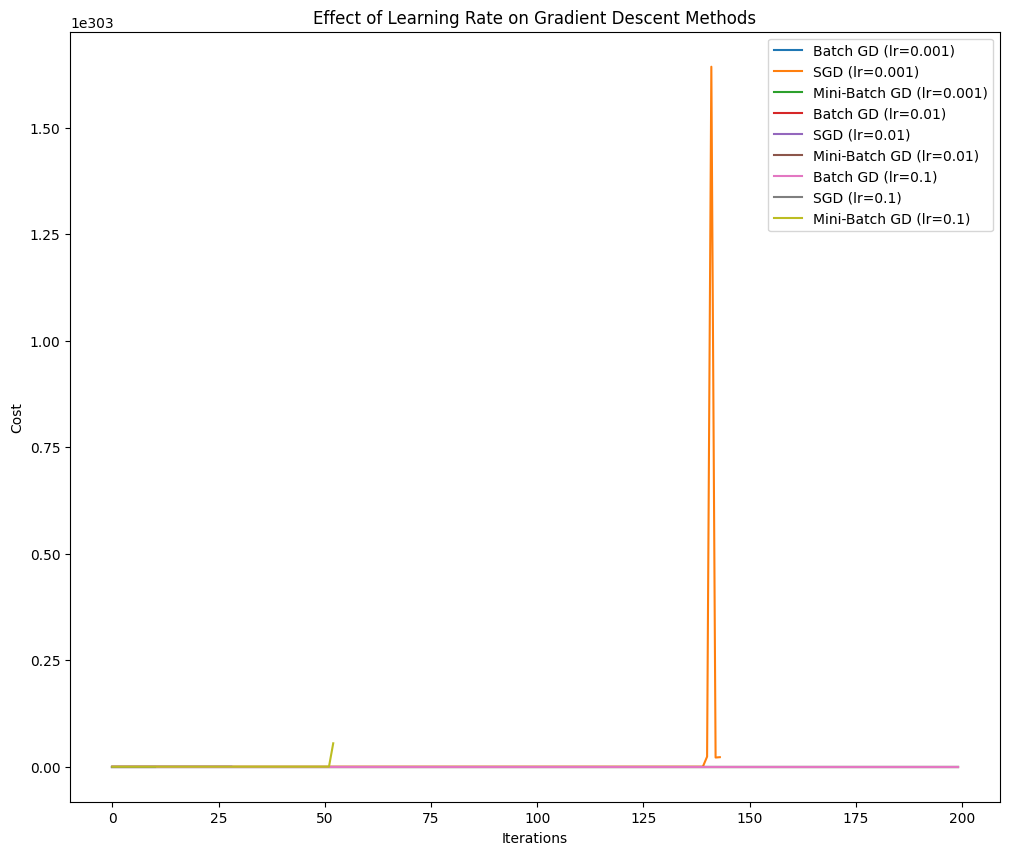

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Standardize the dataset
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = y.reshape(-1, 1)

# Add a column of ones for the bias term
X = np.c_[np.ones(X.shape[0]), X]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the cost function
def cal_cost(y_pred, X, y):
    m = len(y)
    cost = (1 / (2 * m)) * np.sum((np.dot(X, y_pred) - y) ** 2)
    return cost

# Batch Gradient Descent
def batch_gradient_descent(X, y, learning_rate=0.01, iterations=100):
    m, n = X.shape
    y_pred = np.random.randn(n, 1)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        prediction = np.dot(X, y_pred)
        gradients = (1 / m) * X.T.dot(prediction - y)
        y_pred -= learning_rate * gradients
        cost_history[it] = cal_cost(y_pred, X, y)

    return y_pred, cost_history

# Stochastic Gradient Descent
def stochastic_gradient_descent(X, y, learning_rate=0.01, iterations=100):
    m, n = X.shape
    y_pred = np.random.randn(n, 1)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0
        for i in range(m):
            random_idx = np.random.randint(m)
            X_i = X[random_idx:random_idx + 1]
            y_i = y[random_idx:random_idx + 1]

            prediction = np.dot(X_i, y_pred)
            gradients = X_i.T.dot(prediction - y_i)
            y_pred -= learning_rate * gradients
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it] = cost / m

    return y_pred, cost_history

# Mini-Batch Gradient Descent
def minibatch_gradient_descent(X, y, learning_rate=0.01, iterations=100, batch_size=32):
    m, n = X.shape
    y_pred = np.random.randn(n, 1)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i:i + batch_size]
            y_i = y[i:i + batch_size]

            prediction = np.dot(X_i, y_pred)
            gradients = (1 / len(y_i)) * X_i.T.dot(prediction - y_i)
            y_pred -= learning_rate * gradients
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it] = cost / (m / batch_size)

    return y_pred, cost_history

# Test different learning rates for each method
learning_rates = [0.001, 0.01, 0.1]
iterations = 200
batch_size = 32

# Initialize plots
plt.figure(figsize=(12, 10))

# Loop through each learning rate and plot for each method
for lr in learning_rates:
    # Batch Gradient Descent
    _, cost_history_batch = batch_gradient_descent(X_train, y_train, lr, iterations)
    plt.plot(range(iterations), cost_history_batch, label=f'Batch GD (lr={lr})')

    # Stochastic Gradient Descent
    _, cost_history_stochastic = stochastic_gradient_descent(X_train, y_train, lr, iterations)
    plt.plot(range(iterations), cost_history_stochastic, label=f'SGD (lr={lr})')

    # Mini-Batch Gradient Descent
    _, cost_history_minibatch = minibatch_gradient_descent(X_train, y_train, lr, iterations, batch_size)
    plt.plot(range(iterations), cost_history_minibatch, label=f'Mini-Batch GD (lr={lr})')

# Labels and legend
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend(loc='best')
plt.title('Effect of Learning Rate on Gradient Descent Methods')
plt.show()

**Which of the following is TRUE, given the optimal learning rate?**

 (i) Batch gradient descent is always guaranteed to converge to the global optimum of a loss function.

 (ii) Stochastic gradient descent is always guaranteed to converge to the global optimum of a loss function.

 (iii) For convex loss functions (i.e. with a bowl shape), batch gradient descent is guaranteed to eventually converge to the global optimum while stochastic gradient descent is not.

 (iv) For convex loss functions (i.e. with a bowl shape), stochastic gradient descent is guaranteed to eventually converge to the global optimum while batch gradient descent is not.

 (v) For convex loss functions (i.e. with a bowl shape), both stochastic gradient descent and batch gradient descent will eventually converge to the global optimum.

 (vi) For convex loss functions (i.e. with a bowl shape), neither stochastic gradient descent nor batch gradient descent are guaranteed to converge to the global optimum.


The correct statement is:

(v) For convex loss functions (i.e. with a bowl shape), both stochastic gradient descent and batch gradient descent will eventually converge to the global optimum.


Explanation:
Convex Loss Functions: A convex loss function has a single global minimum (optimum), meaning any optimization method that uses gradient descent is guaranteed to eventually reach the global optimum, assuming an appropriate learning rate and sufficient iterations.


Let's analyze each statement:
(i) Batch gradient descent is always guaranteed to converge to the global optimum of a loss function.

This is false. Batch gradient descent is guaranteed to converge to the global optimum only if the loss function is convex. If the loss function has multiple minima (non-convex), batch gradient descent may converge to a local minimum, not the global one.
(ii) Stochastic gradient descent is always guaranteed to converge to the global optimum of a loss function.

This is false. Stochastic gradient descent (SGD) can suffer from high variance due to updates from individual data points, which can prevent convergence to the global optimum. However, in the case of convex loss functions, SGD can still converge to the global optimum if the learning rate is properly adjusted.
(iii) For convex loss functions (i.e. with a bowl shape), batch gradient descent is guaranteed to eventually converge to the global optimum while stochastic gradient descent is not.

This is false. Both batch gradient descent and stochastic gradient descent can converge to the global optimum for convex loss functions, although their convergence behavior might differ. Batch gradient descent converges smoothly, while stochastic gradient descent might have more fluctuation but still eventually converge.
(iv) For convex loss functions (i.e. with a bowl shape), stochastic gradient descent is guaranteed to eventually converge to the global optimum while batch gradient descent is not.

This is false. Batch gradient descent is guaranteed to converge to the global optimum for convex loss functions. Stochastic gradient descent, although it may have noisier updates, can also converge to the global optimum in convex settings, but it might take longer to settle because of the inherent noise in updates.
(v) For convex loss functions (i.e. with a bowl shape), both stochastic gradient descent and batch gradient descent will eventually converge to the global optimum.

This is true. Both methods will eventually converge to the global optimum for convex loss functions. The main difference is that batch gradient descent tends to converge smoothly, while stochastic gradient descent may oscillate or take longer to reach the minimum due to its noisy updates.
(vi) For convex loss functions (i.e. with a bowl shape), neither stochastic gradient descent nor batch gradient descent are guaranteed to converge to the global optimum.

This is false. Both methods are guaranteed to converge to the global optimum for convex loss functions, as discussed above.